In [19]:
#GET DATA
import os
import pandas as pd

df = pd.read_csv("../../../data/pruned/main_tags_songs.csv", sep=";")
df["lyric"] = ""
for ind in df.index:
    song_id = str(df["id"][ind]).zfill(7)
    with open(os.path.join("../../../data/pruned/lyrics", song_id+".txt"), "r",encoding='utf-8') as src:
        lyric = src.read()
    df.loc[ind, "lyric"] = lyric
df.head()

,id,title,artists,langauge,genre,lyric
0,923602,I’m All She’s Got,George Jones,en,country,"Unhappy, well, I should say not\nIf somebody t..."
1,102711,The Last Time,& Taylor Swift,en,country,Find myself at your door\nJust like all those ...
2,3947017,Foolish One (Taylor's Version) [From The Vault],& Taylor Swift,en,country,"My cards are on the table, yours are in your h..."
3,782006,I Hurt For You,Deborah Allen,en,country,To think of all your love she's been denying\n...
4,907072,Dixie Cannonball,Hank Williams,en,country,That's the place I long to be\nWhere the cotto...


In [20]:
#DATA CLEANING
import re
#drop non english columns
df = df.loc[df.langauge=="en"]
#remove punctuation
df['lyric_processed'] = \
df['lyric'].map(lambda x: re.sub('[(),\.!?]', '', x))
#make lowercase
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: x.lower())
df['lyric_processed'].loc[1]

"find myself at your door\njust like all those times before\ni’m not sure how i got there\nall roads they lead me here\ni imagine you are home\nin your room all alone\nand you open your eyes into mine\nand everything feels better\n\n[pre-chorus: both]\nand right before your eyes\ni'm breaking no past\nno reasons why\njust you and me\n\n[chorus: both]\nthis is the last time i'm asking you this\nput my name at the top of your list\nthis is the last time i'm asking you why\nyou break my heart in the blink of an eye eye eye\n\n[verse 2: taylor swift]\nyou find yourself at my door\nand just like all those times before\nyou wear your best apology\nbut i was there to watch you leave\nand all the times i let you in\njust for you to go again\ndisappear when you come back\neverything is better\nyou might also like[pre-chorus: both]\nand right before your eyes\ni'm aching run fast\nnowhere to hide\njust you and me\n\n[chorus: both]\nthis is the last time i'm asking you this\nput my name at the to

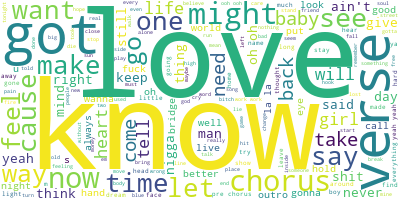

In [3]:
#WORDCLOUD AS EXTRAPOLARYY DATA ANALYSIS
from wordcloud import WordCloud

long_string = ','.join(list(df['lyric_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [21]:
#CONTINUE CLEANING: What are still problems?
'''
Things to do:
1.) Need to filter out chorus, verse, pre-chorus, verse 4, ... all starts as a line with [
2.) Do I want stuff like oh oh or la la or na na or da da? Might remove them when removing stop words
3.) Also forgot to remove linebreaks
'''
#remove verse and stuff of form [ ... ]
pattern = r'\[(.*?)\]'
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: re.sub(pattern, '', x))

#remove line breaks
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: re.sub(r'\n', ' ', x))

#remove extra spaces
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: re.sub(' +', ' ', x))

print(df['lyric_processed'].loc[0])
df['lyric_processed'].head()

unhappy well i should say not if somebody told me that she cheated no i wouldn't believe them 'cause i'm all she's got i'm the reason that she goes on livin' oh she loves me with all of her heart no she can't get enough of my lovin' she'd be nothin' without me 'cause i'm all she's got i'm all she's got and that's all i know anything else would just kill my soul i'll be contented oh if she never stopped saying that she loves me and i'm all she's got i'll be contented if she never stopped saying she loves me and i'm all she's gotyou might also like


0    unhappy well i should say not if somebody told...
1    find myself at your door just like all those t...
2    my cards are on the table yours are in your ha...
3    to think of all your love she's been denying a...
4    that's the place i long to be where the cotton...
Name: lyric_processed, dtype: object

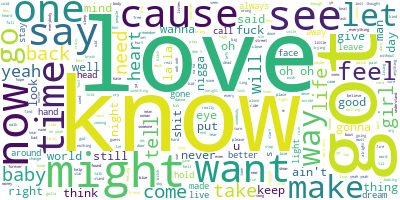

In [5]:
#WORDCLOUD AS EXTRAPOLARYY DATA ANALYSIS: Problems solved?
from wordcloud import WordCloud

long_string = ','.join(list(df['lyric_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [28]:
from sklearn.model_selection import train_test_split

#Split into train and test set: Will use test set for evaluation of lda model as well as data for the classifier
seed = 61
df_train, df_test = train_test_split(df, test_size=0.3, random_state=seed)
#save files
print(df_train.columns)
df_train.to_csv(os.path.join("results", "df_train"), encoding='utf-8-sig')
df_test.to_csv(os.path.join("results", "df_test"), encoding='utf-8-sig')

Index(['id', 'title', 'artists', 'langauge', 'genre', 'lyric',
       'lyric_processed'],
      dtype='object')


In [27]:
#testing nan: Problem also reordering of data. Why the fuck. 
print(len(df_train))
df_train_2 = pd.read_csv(os.path.join("results", "df_train"), encoding='utf-8-sig')
print(len(df_train_2))

for i in range(len(df_train)):
    str1 = df_train["lyric_processed"].loc[i]
    str2 = df_train_2["lyric_processed"].loc[i]
    print(i)
    if str1 != str2:
        print(str1)
        print("--------------------")
        print(str2)
        break

2585
2585
0
unhappy well i should say not if somebody told me that she cheated no i wouldn't believe them 'cause i'm all she's got i'm the reason that she goes on livin' oh she loves me with all of her heart no she can't get enough of my lovin' she'd be nothin' without me 'cause i'm all she's got i'm all she's got and that's all i know anything else would just kill my soul i'll be contented oh if she never stopped saying that she loves me and i'm all she's got i'll be contented if she never stopped saying she loves me and i'm all she's gotyou might also like
--------------------
even though you always were alone you had to push against the fates just to make it make it through the gate but now we're getting older and we're growing up so now less action in the water and we know enough stood up on the rooftop on a night so clear that the lights from the city just disappeared i know you don't believe me when i believe in you i know it could get much easier if you want it to old friend com

In [7]:
#Functions for generating Corpora
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora




                  
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts, stop_words):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
def bigrams(words, bi_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def lyric_to_corpora(lyric_series, stop_words, id2word=None):
    data = lyric_series.values.tolist()
    data_words = list(sent_to_words(data))
    data_words = remove_stopwords(data_words, stop_words)
    #make bigrams
    bigram_mod = bigrams(data_words)
    data_bigrams = [bigram_mod[lyric] for lyric in data_words]
    if id2word is None:
        #Create Dictionary and filter extremes
        id2word = corpora.Dictionary(data_bigrams)
        id2word.filter_extremes(no_below=10, no_above=0.35)
    #Create Corpus
    corpus = [id2word.doc2bow(text) for text in data_bigrams]
    return corpus, id2word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#Make and save Corpora
#Remark on stopwords: 2 versions: including verbs and excluding them
stop_words = stopwords.words('english')
stop_words.extend(['from', 'la','oh','also', 'yeah', 'ooh','uh','chorus','verse','outro','bridge'])

stop_words_extended = stopwords.words('english')
stop_words_extended.extend(['from', 'la','oh','also', 'yeah', 'ooh','uh','chorus','verse','outro','bridge',
                  "know","got","want","feel","might","take","go","tell","make","see","say","come",
                   "need","stay","wanna","said","let","gonna","call","made","give","keep","think","will",
                  "gone","would"])

corpus_train, id2word_train = lyric_to_corpora(df_train.lyric_processed, stop_words)
corpus_test, _ = lyric_to_corpora(df_test.lyric_processed, stop_words, id2word_train)

corpus_train_extended, id2word_train_extended = lyric_to_corpora(df_train.lyric_processed, stop_words_extended)
corpus_test_extended, _ = lyric_to_corpora(df_test.lyric_processed, stop_words_extended, id2word_train_extended)

#save corpora and dicts
corpora.MmCorpus.serialize(os.path.join("results", "corpus_train"), corpus_train)
corpora.MmCorpus.serialize(os.path.join("results", "corpus_test"), corpus_test)
id2word_train.save(os.path.join("results", "id2word_train"))
corpora.MmCorpus.serialize(os.path.join("results", "corpus_train_extended"), corpus_train_extended)
corpora.MmCorpus.serialize(os.path.join("results", "corpus_test_extended"), corpus_test_extended)
id2word_train_extended.save(os.path.join("results", "id2word_train_extended"))

In [15]:
#test load
from pprint import pprint
corpus_train = corpora.MmCorpus(os.path.join("results", "corpus_train"))
id2word_train = corpora.Dictionary.load(os.path.join("results", "id2word_train"))
hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus_train,
                                           id2word = id2word_train,
                                           alpha=0.0625,
                                           random_state=seed)
pprint(hdp_model.print_topics())

[(0,
  '0.010*baby + 0.008*time + 0.008*never + 0.008*cause + 0.008*let + 0.007*go '
  '+ 0.007*say + 0.007*want + 0.007*come + 0.007*way'),
 (1,
  '0.009*never + 0.006*baby + 0.006*cause + 0.006*back + 0.006*go + 0.005*time '
  '+ 0.005*say + 0.005*girl + 0.005*make + 0.005*want'),
 (2,
  '0.010*baby + 0.005*go + 0.004*girl + 0.004*wanna + 0.003*cause + 0.003*tell '
  '+ 0.003*say + 0.003*let + 0.003*could + 0.003*run'),
 (3,
  '0.006*baby + 0.006*come + 0.005*back + 0.005*never + 0.005*girl + 0.003*say '
  '+ 0.003*tell + 0.003*body + 0.003*thing + 0.003*wanna'),
 (4,
  '0.003*put + 0.003*take_care + 0.003*go + 0.002*us + 0.002*never + '
  '0.002*want + 0.002*baby + 0.002*ice + 0.002*life + 0.002*cause'),
 (5,
  '0.003*need + 0.003*time + 0.003*cause + 0.003*way + 0.003*weeping + '
  '0.002*back + 0.002*day + 0.002*never + 0.002*used + 0.002*say'),
 (6,
  '0.003*bitch + 0.003*back + 0.003*make + 0.002*niggas + 0.002*god + '
  '0.002*bad + 0.002*cause + 0.002*hey + 0.002*keep + 0.002*